In [12]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.0 MB/s 


In [2]:
%ls

'전력+사용량(용도별)_20221201091730.csv'   sample_data/


In [3]:
columns = '소계	 소계	 소계	 소계	 전철	 수도	 사업자용	 순수서비스	 소계	 농립어업	 광업	 제조업	 소계	 소계	 소계	 소계	 전철	 수도	 사업자용	 순수서비스	 소계	 농립어업	 광업	 제조업	 소계	 소계	 소계	 소계	 전철	 수도	 사업자용	 순수서비스	 소계	 농립어업	 광업	 제조업'.split('\t ')

In [5]:
import pandas as pd
use_elec_pd = pd.read_csv('전력+사용량(용도별)_20221201091730.csv', header = [0,1,2,3])

In [6]:
columns = set([c[0] for idx, c in enumerate(use_elec_pd.columns) if idx>=3])
columns

{'2021. 10', '2021. 11', '2021. 12'}

In [7]:
total_list = [use_elec_pd[i]['합계']['소계']['소계'][0] for i in columns]

In [8]:
total_list

[3963700, 3578614, 3537141]

In [9]:
from collections import defaultdict
kind_elect = defaultdict(list)
total = []
index = []
for date in columns:
  index.append(date)
  total.append(use_elec_pd[date]['합계']['소계']['소계'][0])
  sec_columns = use_elec_pd[date]['합계'].columns
  sec_columns = set([value[0] for idx,value in enumerate(sec_columns) if value!='소계'])
  # print(sec_columns)
  
  for kind in sec_columns:
    if kind != '소계':
      kind_elect[kind].append(use_elec_pd[date]['합계'][kind]['소계'][0])

In [10]:
index, total, kind_elect

(['2021. 12', '2021. 10', '2021. 11'],
 [3963700, 3578614, 3537141],
 defaultdict(list,
             {'서비스업': [2352648, 2107191, 2050450],
              '공공용': [336239, 254397, 270336],
              '산업용': [128338, 110820, 115192],
              '가정용': [1146475, 1106205, 1101163]}))

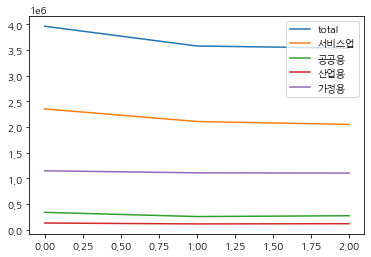

In [13]:
import matplotlib.pyplot as plt
plt.plot(total, label='total')
for key, value in kind_elect.items():
  plt.plot(value, label=key)
plt.legend()
plt.show()